In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import requests
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(url, result_key):
    json = {}
    try:
        json = requests.get(url, headers = { 'X-Auth-Token': '82c20ce437774410889891fb334c0641' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': '21,125,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': '204,900,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players

In [5]:
for team in teams:
    cost = team['squadMarketValue']
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    losses = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            losses += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        else:
            losses += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
    print('Team "{}", cost {}, {} losses'.format(team['name'], cost, losses))
    team['cost'] = cost
    team['losses'] = losses

Team "FC Rio Ave", cost 21,125,000 €, 26 losses
Team "FC Porto", cost 204,900,000 €, 13 losses
Team "Moreirense FC", cost 9,950,000 €, 29 losses
Team "FC Paços de Ferreira", cost 17,725,000 €, 28 losses
Team "Sporting CP", cost 220,250,000 €, 26 losses
Team "Maritimo Funchal", cost 18,275,000 €, 16 losses
Team "CD Tondela", cost 11,575,000 €, 33 losses
Team "SL Benfica", cost 180,150,000 €, 21 losses
Team "Boavista Porto FC", cost 14,025,000 €, 22 losses
Team "FC Arouca", cost 18,025,000 €, 23 losses
Team "Vitoria Setubal", cost 21,200,000 €, 18 losses
Team "C.F. Os Belenenses", cost 23,650,000 €, 18 losses
Team "Vitoria Guimaraes", cost 32,850,000 €, 20 losses
Team "Sporting Braga", cost 63,800,000 €, 15 losses
Team "GD Estoril Praia", cost 12,950,000 €, 22 losses
Team "Feirense", cost None, 32 losses
Team "Nacional Funchal", cost 21,925,000 €, 26 losses
Team "G.D. Chaves", cost None, 17 losses


In [18]:
team_for_pd = []
for team in teams:
    if team['cost']:
        if ',' in team['cost'].split()[0]:
            cost = int(team['cost'].split()[0].replace(',', ''))
        team_for_pd.append({'name': team['name'], 'cost': cost, 'losses': team['losses']})
team_for_pd

[{'cost': 21125000, 'losses': 26, 'name': 'FC Rio Ave'},
 {'cost': 204900000, 'losses': 13, 'name': 'FC Porto'},
 {'cost': 9950000, 'losses': 29, 'name': 'Moreirense FC'},
 {'cost': 17725000, 'losses': 28, 'name': 'FC Paços de Ferreira'},
 {'cost': 220250000, 'losses': 26, 'name': 'Sporting CP'},
 {'cost': 18275000, 'losses': 16, 'name': 'Maritimo Funchal'},
 {'cost': 11575000, 'losses': 33, 'name': 'CD Tondela'},
 {'cost': 180150000, 'losses': 21, 'name': 'SL Benfica'},
 {'cost': 14025000, 'losses': 22, 'name': 'Boavista Porto FC'},
 {'cost': 18025000, 'losses': 23, 'name': 'FC Arouca'},
 {'cost': 21200000, 'losses': 18, 'name': 'Vitoria Setubal'},
 {'cost': 23650000, 'losses': 18, 'name': 'C.F. Os Belenenses'},
 {'cost': 32850000, 'losses': 20, 'name': 'Vitoria Guimaraes'},
 {'cost': 63800000, 'losses': 15, 'name': 'Sporting Braga'},
 {'cost': 12950000, 'losses': 22, 'name': 'GD Estoril Praia'},
 {'cost': 21925000, 'losses': 26, 'name': 'Nacional Funchal'}]

In [19]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,cost,losses,name
0,21125000,26,FC Rio Ave
1,204900000,13,FC Porto
2,9950000,29,Moreirense FC
3,17725000,28,FC Paços de Ferreira
4,220250000,26,Sporting CP
5,18275000,16,Maritimo Funchal
6,11575000,33,CD Tondela
7,180150000,21,SL Benfica
8,14025000,22,Boavista Porto FC
9,18025000,23,FC Arouca


In [20]:
del teams_pd['name']
teams_pd

,cost,losses
0,21125000,26
1,204900000,13
2,9950000,29
3,17725000,28
4,220250000,26
5,18275000,16
6,11575000,33
7,180150000,21
8,14025000,22
9,18025000,23


In [21]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 0.29538773,  4.86491481],
       [ 2.86508619,  2.4324574 ],
       [ 0.13912937,  5.42625113],
       [ 0.24784604,  5.23913902],
       [ 3.07972296,  4.86491481],
       [ 0.2555366 ,  2.99379373],
       [ 0.1618515 ,  6.17469956],
       [ 2.51901063,  3.92935427],
       [ 0.19610949,  4.11646637],
       [ 0.25204089,  4.30357848],
       [ 0.29643644,  3.36801794],
       [ 0.33069443,  3.36801794],
       [ 0.45933666,  3.74224216],
       [ 0.8921059 ,  2.80668162],
       [ 0.18107792,  4.11646637],
       [ 0.30657401,  4.86491481]])

In [23]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 0.23015773,  5.31398386],
        [ 1.24559238,  4.26615606],
        [ 0.84986604,  3.11853513]]),
 array([0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0], dtype=int32))

In [24]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'b',
 'r',
 'r',
 'g',
 'b',
 'r',
 'g',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'g',
 'r']

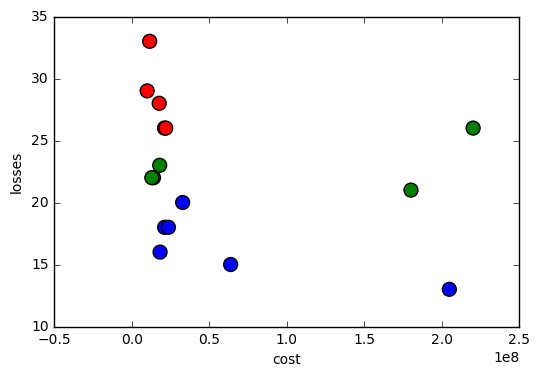

In [25]:
teams_pd.plot.scatter(x='cost', y='losses', c=colors, s=100)

In [30]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 2.86508619,  2.4324574 ],
        [ 0.24623801,  4.45326817],
        [ 0.1829423 ,  5.61336324],
        [ 0.44682201,  3.25575068],
        [ 2.79936679,  4.39713454]]),
 array([1, 0, 2, 2, 4, 3, 2, 4, 1, 1, 3, 3, 3, 3, 1, 1], dtype=int32))

In [31]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'r',
 'b',
 'b',
 'm',
 'y',
 'b',
 'm',
 'g',
 'g',
 'y',
 'y',
 'y',
 'y',
 'g',
 'g']

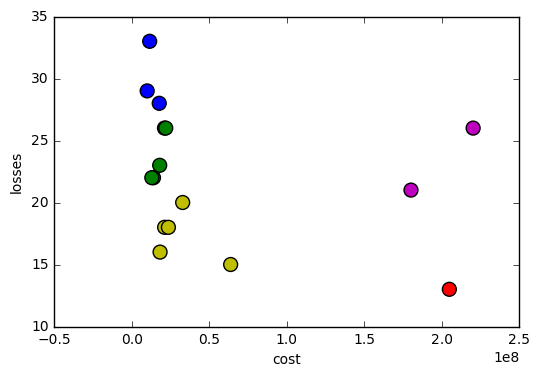

In [32]:
teams_pd.plot.scatter(x='cost', y='losses', c=colors, s=100)